In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import scipy.integrate as integrate
import warnings
import sympy as smp
from ipywidgets import interact

#warnings.filterwarnings('ignore')

# Построим график для mu = 1, и для t из интервала [0, 10000]

0.0006989507812840273


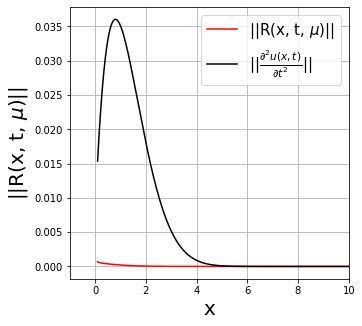

In [3]:
a   = 5
c_0 = 1

x, t, mu = smp.symbols('x t mu')

#Functions
c_x          = smp.sqrt(x)
tau_x_plus   = 2 * ( smp.sqrt(x) - smp.sqrt(a) )
tau_x_minus  = 2 * ( smp.sqrt(a) - smp.sqrt(x) )
V_xt_plus    = smp.exp( (-1/2) * ( (c_0 / mu) * (tau_x_plus - t) )**2 )
V_xt_minus   = smp.exp( (-1/2) * ( (c_0 / mu) * (tau_x_minus + t) )**2 )

u_xt         = (1/2) * smp.sqrt(c_0 / c_x) * (V_xt_plus + V_xt_minus)

first_der_u_t = u_xt.diff(t)
sec_der_u_t   = first_der_u_t.diff(t)

first_der_u_x = u_xt.diff(x)
c2_x_ux_x     = (c_x**2) * first_der_u_x
partial_op_c2x_x_uxx_x = c2_x_ux_x.diff(x)

lmbd_sd_u_t = smp.lambdify((x, t, mu), sec_der_u_t, "numpy")
lmbd_fd_u_x = smp.lambdify((x, t, mu), partial_op_c2x_x_uxx_x, "numpy")
lmbd_u_xt   = smp.lambdify((x, t, mu), u_xt, "numpy")

x_np_arr = np.linspace(0.1, 100, 10000)
t_np_arr = np.linspace(0, 100, 10000)
mu_val   = 1

vals_sd_u_t = lmbd_sd_u_t(x_np_arr, t_np_arr, mu_val)
vals_fd_u_x = lmbd_fd_u_x(x_np_arr, t_np_arr, mu_val)

R_xmu = np.abs(vals_sd_u_t - vals_fd_u_x)
print(np.max(R_xmu))
fig = plt.figure(figsize=(5, 5))
plt.grid()

plt.plot(x_np_arr, R_xmu, label=r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', color="red")
plt.plot(x_np_arr, vals_sd_u_t, label=r'$||\frac{\partial^{2} u(x, t)}{\partial t^{2}}||$', color="black")

plt.xlim([-1, 10])

plt.ylabel(r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', fontsize = 20)
plt.xlabel("x", fontsize = 20)
plt.legend(fontsize = 15)
plt.show()    

# Варьируем параметр mu

In [4]:
def f_var_mu(param_mu):
    inter_x_np_arr = np.linspace(0.1, 100, 10000)
    inter_t_np_arr = np.linspace(0, 100, 10000)
    
    vals_sd_u_t = lmbd_sd_u_t(inter_x_np_arr, inter_t_np_arr, param_mu)
    vals_fd_u_x = lmbd_fd_u_x(inter_x_np_arr, inter_t_np_arr, param_mu)
    
    R_xmu = np.abs(vals_sd_u_t - vals_fd_u_x)
    
    fig = plt.figure(figsize=(5, 5))
    plt.grid()

    plt.plot(inter_x_np_arr, R_xmu, label=r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', color="red")
    plt.plot(inter_x_np_arr, vals_sd_u_t, label=r'$||\frac{\partial^{2} u(x, t)}{\partial t^{2}}||$', color="black")

    plt.xlim([-1, 10])

    plt.ylabel(r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', fontsize = 20)
    plt.xlabel("x", fontsize = 20)
    plt.legend(fontsize = 15)
    plt.show()
    
interact(f_var_mu, param_mu=(0.1, 2, 0.1))

interactive(children=(FloatSlider(value=1.0, description='param_mu', max=2.0, min=0.1), Output()), _dom_classe…

<function __main__.f_var_mu(param_mu)>

# Варьируем mu, t

In [5]:
def f_var_mu_t(param_t, param_mu):
    inter_x_np_arr = np.linspace(0.1, 100, 10000)
    
    vals_sd_u_t = lmbd_sd_u_t(inter_x_np_arr, param_t, param_mu)
    vals_fd_u_x = lmbd_fd_u_x(inter_x_np_arr, param_t, param_mu)
    
    R_xmu = np.abs(vals_sd_u_t - vals_fd_u_x)
    
    fig = plt.figure(figsize=(5, 5))
    plt.grid()

    plt.plot(inter_x_np_arr, R_xmu, label=r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', color="red")
    plt.plot(inter_x_np_arr, np.abs(vals_sd_u_t), label=r'$||\frac{\partial^{2} u(x, t)}{\partial t^{2}}||$', color="black")

    plt.xlim([-1, 10])
    plt.ylim([-2.5, 2.5])

    plt.ylabel(r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', fontsize = 20)
    plt.xlabel("x", fontsize = 20)
    plt.legend(fontsize = 15)
    plt.show()
    
interact(f_var_mu_t, param_t=(0, 100, 1), param_mu=(0.1, 2, 0.1))

interactive(children=(IntSlider(value=50, description='param_t'), FloatSlider(value=1.0, description='param_mu…

<function __main__.f_var_mu_t(param_t, param_mu)>

In [7]:
def prof_var_mu_t(param_t, param_mu):
    inter_x_np_arr = np.linspace(-100, 100, 10000)
    x_depth = np.linspace(-100, 100)
    depth = []
    
    for i in x_depth:
        depth.append(-i)
    depth = np.array(depth)
    
    vals_sd_u_t = lmbd_sd_u_t(inter_x_np_arr, param_t, param_mu)
    vals_fd_u_x = lmbd_fd_u_x(inter_x_np_arr, param_t, param_mu)
    vals_u_xt   = lmbd_u_xt(inter_x_np_arr, param_t, param_mu)
    
    R_xmu = np.abs(vals_sd_u_t - vals_fd_u_x)
    
    fig = plt.figure(figsize=(10, 5))
    plt.grid()
    
    plt.plot(inter_x_np_arr, R_xmu, label=r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', color="red")
    plt.plot(inter_x_np_arr, vals_u_xt, label=r'$u(x, t)$')
    plt.plot(x_depth, depth, label=r'$D(x)$')
    
    plt.xlim([-20,40])
    plt.ylim([-2.5, 2.5])

    plt.ylabel(r'$||$' + "R(x, t, " + r'$\mu$' +  ")" + r'$||$', fontsize = 20)
    plt.xlabel("x", fontsize = 20)
    plt.legend(fontsize = 15)
    plt.show()
    
interact(prof_var_mu_t, param_t=(0, 5, 0.2), param_mu=(0.01, 2, 0.1))

interactive(children=(FloatSlider(value=2.0, description='param_t', max=5.0, step=0.2), FloatSlider(value=0.91…

<function __main__.prof_var_mu_t(param_t, param_mu)>